In [1]:
base_path = "/Users/hoapham/Documents/Cá Nhân/Cao Học/Tài liệu học tập/Học Phầnn 1/4. Thống Kê Nhiều Chiều/Project"

In [2]:
setwd(base_path)

ERROR: Error in setwd(base_path): cannot change working directory


# Example 5.3 Data for radiation from microwave Data về bức xạ của lò vi sóng

In [52]:
# install packagae  ellipse to draw ellipse
library(ellipse)

In [53]:
path = paste(base_path, "Chapter3/T4-1.DAT", sep = "/")
radC=read.table(path,header=F)

In [54]:
dim(radC)

[1] 42  1

In [55]:
names(radC)

[1] "V1"

In [56]:
path = paste(base_path, "Chapter3/T4-5.DAT", sep = "/")
radO=read.table(path,header=F)

In [57]:
dim(radO)

[1] 42  1

In [58]:
radcl=radC**(.25) #radcl=(radC)^(1/4)

In [59]:
head(radcl)

,V1
,<dbl>
1,0.6223330
2,0.5477226
3,0.6513556
4,0.5623413
5,0.4728708
6,0.5885662


In [60]:
head(radC)

,V1
,<dbl>
1,0.15
2,0.09
3,0.18
4,0.10
5,0.05
6,0.12


In [61]:
radop=radO**(.25)

In [62]:
rad=cbind(radcl,radop)

In [63]:
dim(rad)

[1] 42  2

In [64]:
n=nrow(rad)

In [65]:
p=ncol(rad)

In [66]:
(xbar=colMeans(rad))

V1        V1 
0.5642575 0.6029812

In [67]:
(S=cov(rad))

,V1,V1
V1,0.01435023,0.01171547
V1,0.01171547,0.01454530


In [68]:
solve(S)

,V1,V1
V1,203.4981,-163.9069
V1,-163.9069,200.7691


In [69]:
#eigenvalue and eigenvector pairs for S
eig=eigen(S)
eig$values
eig$vectors

[1] 0.026163638 0.002731895

0.7041574,-0.7100439
0.7100439,0.7041574


In [70]:
# c^2=(p(n-1))/(n-p)F_{p,n-p}(alpha)
(c2=p*(n-1)*qf(.95,p,n-p)/(n-p))

[1] 6.62504

### The 95% confidence ellipse for \mu=(mu1, mu2)
##### check if in ellipse

In [71]:

xmu=c(.562,.589)

# xmu=c(.5555,.6077)


In [72]:
xbar
tsq=n*t(xbar-xmu)%*%solve(S)%*%(xbar-xmu)
c(tsq,c2)# tsq <c2, xmu is in the region.
#(equivalently, a test .... not reject H0 at the 5% level of signification)

V1        V1 
0.5642575 0.6029812

[1] 1.25730 6.62504

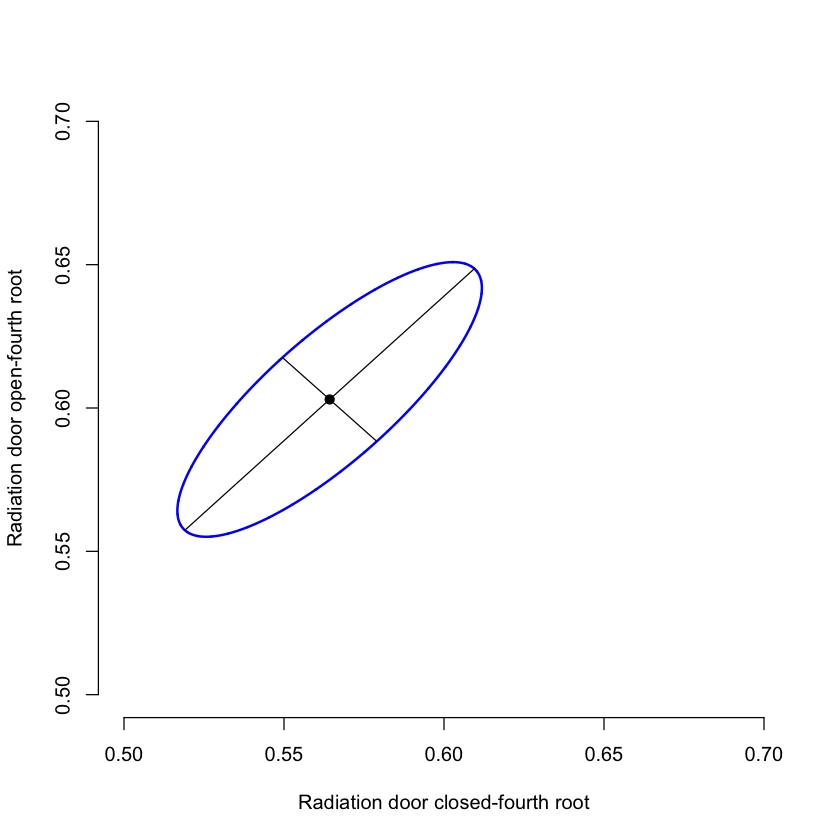

In [73]:
###draw ellipse
#eig=eigen(S)
a1=xbar-sqrt(c2*eig$value[1]/n)%*% eig$vector[,1] #equ 5-19
b1=xbar+sqrt(c2*eig$value[1]/n)%*% eig$vector[,1]
a2=xbar-sqrt(c2*eig$value[2]/n)%*% eig$vector[,2]
b2=xbar+sqrt(c2*eig$value[2]/n)%*% eig$vector[,2]

eli = ellipse(S, centre=xbar,t=sqrt(c2/n), npoint=5000)
plot(eli, cex=.3,bty="n", xlab="Radiation door closed-fourth root", ylab="Radiation door open-fourth root",
 xlim=c(.5,.7),ylim=c(.5,.7),type="l",lwd=2,col="blue")
 points(xbar[1],xbar[2],pch=19)
 segments(xbar[1],xbar[2],a1[1],a1[2])
 segments(xbar[1],xbar[2],b1[1],b1[2])
 segments(xbar[1],xbar[2],a2[1],a2[2])
 segments(xbar[1],xbar[2],b2[1],b2[2])



In [74]:
a1

0.5190211,0.5573666
